# XML Data Parcing

### phase.1) Data Parcing
 - all steps

In [45]:
import pandas as pd
import xml.etree.ElementTree as ET
import sys

if sys.version_info[0] == 3 : 
    from urllib.request import urlopen  
else : 
    from urllib import urlopen  

In [46]:
url = "https://www.w3schools.com/xml/cd_catalog.xml"
url

'https://www.w3schools.com/xml/cd_catalog.xml'

In [47]:
opened = urlopen(url)
opened

In [48]:
response = opened.read()
print("type of 'response' :", type(response))
response[0:200]

type of 'response' : <class 'bytes'>


b'<?xml version="1.0" encoding="UTF-8"?>\r\n<CATALOG>\r\n  <CD>\r\n    <TITLE>Empire Burlesque</TITLE>\r\n    <ARTIST>Bob Dylan</ARTIST>\r\n    <COUNTRY>USA</COUNTRY>\r\n    <COMPANY>Columbia</COMPANY>\r\n    <PRICE>'

In [49]:
xtree = ET.fromstring(response)
xtree

<Element 'CATALOG' at 0x7fc0196ecc20>

In [41]:
for node in xtree : 
    n_title = node.find("TITLE").text  # title : error
    print(n_title)

Empire Burlesque
Hide your heart
Greatest Hits
Still got the blues
Eros
One night only
Sylvias Mother
Maggie May
Romanza
When a man loves a woman
Black angel
1999 Grammy Nominees
For the good times
Big Willie style
Tupelo Honey
Soulsville
The very best of
Stop
Bridge of Spies
Private Dancer
Midt om natten
Pavarotti Gala Concert
The dock of the bay
Picture book
Red
Unchain my heart


In [57]:
rows = []
for node in xtree:
    n_title = node.find("TITLE").text
    n_artist = node.find("ARTIST").text
    rows.append({"title": n_title,
                 "artist": n_artist})    

In [58]:
# convert XML data to pandas DataFrame
columns = ["title", "artist"]
catalog_cd_df = pd.DataFrame(rows, columns = columns)
catalog_cd_df.head(5)

,title,artist
0,Empire Burlesque,Bob Dylan
1,Hide your heart,Bonnie Tyler
2,Greatest Hits,Dolly Parton
3,Still got the blues,Gary Moore
4,Eros,Eros Ramazzotti


### phase.1) Data Parcing
 - compact / one-cell

In [64]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import sys

if sys.version_info[0] == 3 : 
    from urllib.request import urlopen  
else : 
    from urllib import urlopen  
    
url = "https://www.w3schools.com/xml/cd_catalog.xml"
response = urlopen(url).read()
xtree = ET.fromstring(response)

rows = []

# iterate through each node of the tree
for node in xtree:
    n_title = node.find("TITLE").text
    n_artist = node.find("ARTIST").text
    n_country = node.find("COUNTRY").text
    n_company = node.find("COMPANY").text
    n_price = node.find("PRICE").text
    n_year = node.find("YEAR").text
    
    rows.append({"title": n_title, 
                 "artist": n_artist, 
                 "country": n_country, 
                 "company": n_company, 
                 "price": n_price, 
                 "year": n_year})    

# convert XML data to pandas DataFrame
columns = ["title", "artist", "country", "company", "price", "year"]
catalog_cd_df = pd.DataFrame(rows, columns = columns)
catalog_cd_df.head(5)

,title,artist,country,company,price,year
0,Empire Burlesque,Bob Dylan,USA,Columbia,10.90,1985
1,Hide your heart,Bonnie Tyler,UK,CBS Records,9.90,1988
2,Greatest Hits,Dolly Parton,USA,RCA,9.90,1982
3,Still got the blues,Gary Moore,UK,Virgin records,10.20,1990
4,Eros,Eros Ramazzotti,EU,BMG,9.90,1997


### phase.2) Processing & Visualizing

In [65]:
display(catalog_cd_df.dtypes)
catalog_cd_df = catalog_cd_df.astype({'price': np.float, 'year': int})
print('--------------------')
display(catalog_cd_df.dtypes)

title      object
artist     object
country    object
company    object
price      object
year       object
dtype: object

--------------------


title       object
artist      object
country     object
company     object
price      float64
year         int64
dtype: object

In [66]:
country_mean = catalog_cd_df.groupby('country').price.mean()
country_mean

country
EU        9.320000
Norway    7.900000
UK        8.984615
USA       9.385714
Name: price, dtype: float64

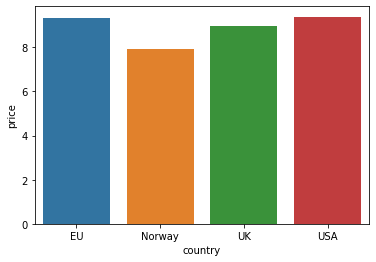

In [69]:
country_mean_df = pd.DataFrame(country_mean).reset_index()

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='country', y='price', data=country_mean_df)
plt.show()

## c.f.) weather

In [1]:
import requests
myapi = "af44a23b3fa31260fd92b236a65bffa3"

#lat: 위도, #lon:경도
def makeurl(lat, lng):
    url = "https://api.openweathermap.org/data/2.5/onecall?lat={}&lon={}&appid={}".format(lat, lng, myapi)
    return url

response = requests.get(makeurl(37,127))
weather = response.json()
weather

{'lat': 37,
 'lon': 127,
 'timezone': 'Asia/Seoul',
 'timezone_offset': 32400,
 'current': {'dt': 1604127173,
  'sunrise': 1604094897,
  'sunset': 1604133368,
  'temp': 291.88,
  'feels_like': 286.73,
  'pressure': 1023,
  'humidity': 34,
  'dew_point': 275.71,
  'uvi': 3.48,
  'clouds': 40,
  'visibility': 10000,
  'wind_speed': 5.1,
  'wind_deg': 250,
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}]},
 'minutely': [{'dt': 1604127180, 'precipitation': 0},
  {'dt': 1604127240, 'precipitation': 0},
  {'dt': 1604127300, 'precipitation': 0},
  {'dt': 1604127360, 'precipitation': 0},
  {'dt': 1604127420, 'precipitation': 0},
  {'dt': 1604127480, 'precipitation': 0},
  {'dt': 1604127540, 'precipitation': 0},
  {'dt': 1604127600, 'precipitation': 0},
  {'dt': 1604127660, 'precipitation': 0},
  {'dt': 1604127720, 'precipitation': 0},
  {'dt': 1604127780, 'precipitation': 0},
  {'dt': 1604127840, 'precipitation': 0},
  {'dt': 1604127900